In [6]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.pbfg as pbfg
import mlgrad.gd as gd

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("data/animals.dat", sep=',')

In [8]:
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [13]:
X = df["body"].values.reshape((-1,1))
X = np.asarray(X, "d")
Y = df["brain"].values

X = np.log(X)
Y = np.log(Y)

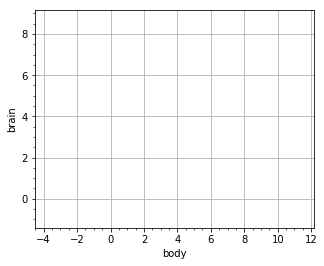

In [14]:
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=64, c='w')
plt.xlabel('body')
plt.ylabel('brain')
plt.minorticks_on()
plt.grid(1)
#plt.loglog()
plt.show()

In [15]:
loss_func = loss.Loss(func.Square())
loss_func

In [16]:
penalty_func = func.Quantile_AlphaLog(0.001, 0.5)
penalty_func

In [17]:
param_init = np.random.random((2,))
lm_learn1 = model.LinearModel(param_init.copy())

In [43]:
avrfunc = avragg.Average_AdaM(penalty_func, h=0.2, tol=1.0e-4)
fg = gd.AdaM(lm_learn1, loss_func, h=0.01, tol=1.0e-4)
alg1 = pbfg
alg1.fit(X, Y)
print("M:", alg1.M, "K:", fg.K)

M: 1001 K: 168


In [44]:
lm_learn1

In [29]:
param_init2 = np.random.random((2,))
lm_learn2 = model.LinearModel(param_init2)

alg2 = gd.AdaM(lm_learn2, loss_func, h=0.1, tol=1.0e-7, n_iter=10000)
alg2.fit(X, Y)
print("K:", alg2.K)

K: 240


In [30]:
lm_learn2

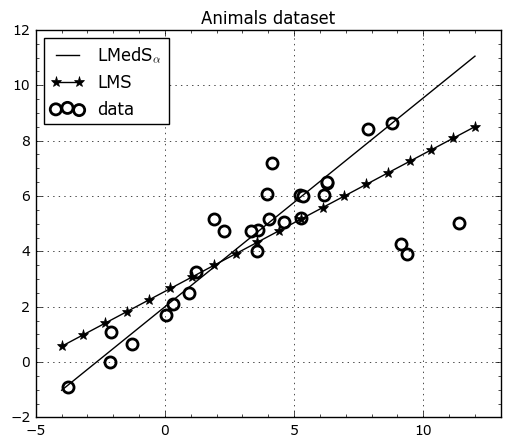

In [45]:
plt.figure(figsize=(6.0, 5.0))
plt.title('Animals dataset')
X0 = np.linspace(-4., 12., 20)
plt.scatter(X, Y, s=64, c='w', edgecolors='k', linewidths=2., label='data')
plt.plot(X0, lm_learn1.evaluate_all(X0.reshape(-1,1)), c='k', label=r'LMedS$_\alpha$')
plt.plot(X0, lm_learn2.evaluate_all(X0.reshape(-1,1)), c='k', marker='*', markersize=8, label=r'LMS')
plt.minorticks_on()
plt.grid(1)
plt.legend(loc='best')
plt.xlim(-5., 13.)
plt.ylim(-2., 12.)
plt.show()